In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [30]:
df = pd.read_csv("experiments.csv")

df_mysql = df[df["db"] == "mysql"]
df_sqlite = df[df["db"] == "sqlite"]

df.head()

,db,energy,time
0,sqlite,37.299377,3.020262
1,sqlite,42.392639,3.422475
2,mysql,79.951111,4.822397
3,sqlite,35.952759,3.020741
4,mysql,124.162415,5.226695


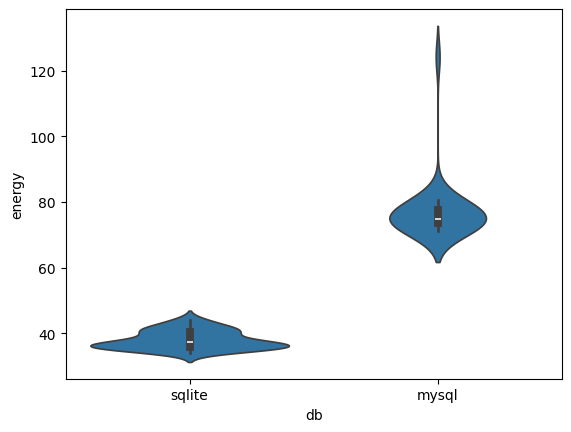

In [32]:
sns.violinplot(x="db", y="energy", data=df)
plt.show()

<Axes: xlabel='db', ylabel='energy'>

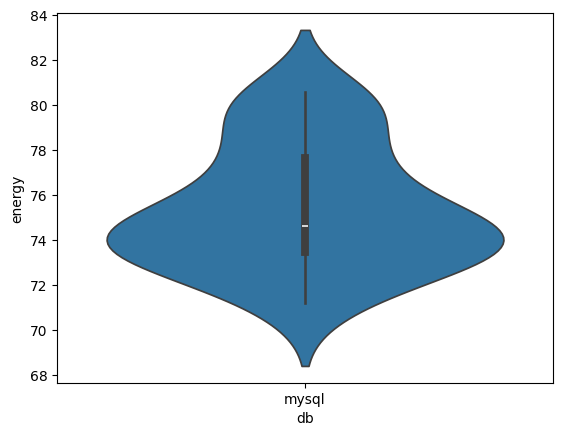

In [ ]:
# z-score outlier removal
# remove all data points that deviate from the mean more than 3 standard deviations

z = np.abs((df_mysql["energy"] - df_mysql["energy"].mean()) / df_mysql["energy"].std())

df_mysql = df_mysql[z < 3]

sns.violinplot(x="db", y="energy", data=df_mysql)

<Axes: xlabel='db', ylabel='energy'>

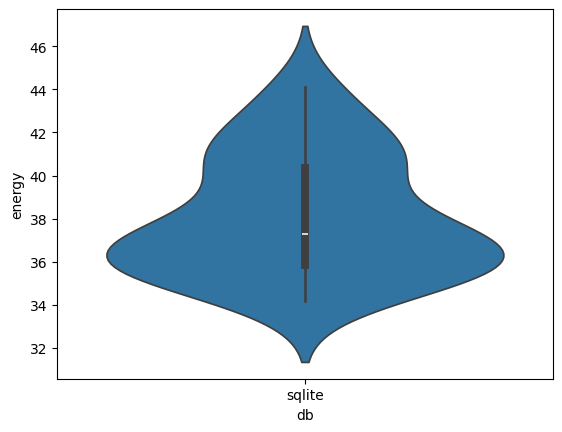

In [37]:
z = np.abs(
    (df_sqlite["energy"] - df_sqlite["energy"].mean()) / df_sqlite["energy"].std()
)

df_sqlite = df_sqlite[z < 3]

sns.violinplot(x="db", y="energy", data=df_sqlite)

In [35]:
# shapiro-wilk test

stat, p = shapiro(df_mysql["energy"])
stat, p

(0.9252633670341034, 0.041531005992749434)

In [36]:
stat, p = shapiro(df_sqlite["energy"])
stat, p

(0.9159235422218666, 0.02105233953772203)